#Wellcome
In this notebook, I will do sentiment analysis on Twitter with a famous person's account to see the sentiment on their account

In [79]:
#import liblary

import tweepy as tw
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


The token I use here is from the Twitter developer, you can use your own token

In [80]:
#fill the token api

api_key = ''
api_secrect_key = ''
bearer_token = ''
access_token = ''
access_token_secret = ''

In [81]:
#giving authentication

auth = tw.OAuthHandler(api_key,api_secrect_key)
auth.set_access_token(access_token,access_token_secret)
api = tw.API(auth)

In [82]:
# extract 200 tweets
posts = api.user_timeline(screen_name= 'elonmusk', count= 200, lang='en', tweet_mode='extended')

#print 5 tweets recent from the account
print('tampilkan 5 tweet terbaru: \n')

i=1
for tweet in posts[0:5]:
  print(str(i) + ')', tweet.full_text + '\n')
  i = i + 1

tampilkan 5 tweet terbaru: 

1) @SawyerMerritt @SpaceX It’s a start. About 1000 times more mass to orbit per year will be needed to make life multiplanetary.

2) @BillyM2k Already did it

3) @Teslaconomics Haha damn, maybe I should take off my shirt more often … free the nip!! 
(already back in the factory btw)

4) @teslaownersSV Still needs a few tweaks

5) @JohnnaCrider1 @TwitterSupport @Teslarati @WholeMarsBlog 🤔



In [83]:
#make a dataframe with columns named tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns = ['Tweets'])

#show 5 top tweets
df.head(5)

,Tweets
0,@SawyerMerritt @SpaceX It’s a start. About 100...
1,@BillyM2k Already did it
2,"@Teslaconomics Haha damn, maybe I should take ..."
3,@teslaownersSV Still needs a few tweaks
4,@JohnnaCrider1 @TwitterSupport @Teslarati @Who...


In [84]:
#Clean the text

#Fungction for cleaning the tweets

def clean_text(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #remove @mentions
  text = re.sub(r'#', '', text) #remove '# simbols
  text = re.sub (r'RT[\s]+', '', text) #remove RT
  text = re.sub(r'https?:\/\/S+', '', text) #remove hyperlink

  return text

#cleaning the text
df['Tweets'] = df['Tweets'].apply(clean_text)

# show the cleaned text
df

,Tweets
0,It’s a start. About 1000 times more mass to ...
1,Already did it
2,"Haha damn, maybe I should take off my shirt m..."
3,Still needs a few tweaks
4,🤔
...,...
195,But sometimes they’re out of stock\nhttps://t....
196,That was the largest wheel of cheese in the B...
197,"I love many cheeses, so hard to say that a pa..."
198,The sheer variety of cheese is amazing


In [85]:
# create a function to get the subjectivity
def get_sebjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns
df['subjectivity'] = df['Tweets'].apply(get_sebjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

#show the new dataframe with the new columns
df

,Tweets,subjectivity,Polarity
0,It’s a start. About 1000 times more mass to ...,0.500,0.50000
1,Already did it,0.000,0.00000
2,"Haha damn, maybe I should take off my shirt m...",0.400,0.33125
3,Still needs a few tweaks,0.100,-0.20000
4,🤔,0.000,0.00000
...,...,...,...
195,But sometimes they’re out of stock\nhttps://t....,0.000,0.00000
196,That was the largest wheel of cheese in the B...,0.000,0.00000
197,"I love many cheeses, so hard to say that a pa...",0.455,0.37500
198,The sheer variety of cheese is amazing,0.825,0.30000


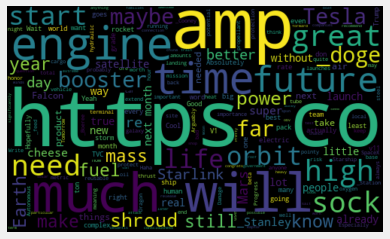

In [86]:
# Plot the word cloud
all_words = ' '.join([twts for twts in df['Tweets']])
word_clouds = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119 ).generate(all_words)

plt.imshow(word_clouds, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [87]:
#create a function to compute the negative, neutral and positive analysis
def get_analysis(score):
  if score < 0.0:
    return 'Negative'
  elif score ==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(get_analysis)

#show the dataframe
df

,Tweets,subjectivity,Polarity,Analysis
0,It’s a start. About 1000 times more mass to ...,0.500,0.50000,Positive
1,Already did it,0.000,0.00000,Neutral
2,"Haha damn, maybe I should take off my shirt m...",0.400,0.33125,Positive
3,Still needs a few tweaks,0.100,-0.20000,Negative
4,🤔,0.000,0.00000,Neutral
...,...,...,...,...
195,But sometimes they’re out of stock\nhttps://t....,0.000,0.00000,Neutral
196,That was the largest wheel of cheese in the B...,0.000,0.00000,Neutral
197,"I love many cheeses, so hard to say that a pa...",0.455,0.37500,Positive
198,The sheer variety of cheese is amazing,0.825,0.30000,Positive


In [88]:
#print all of the positive twets
j=1

sorted_df = df.sort_values(by=['Polarity'])
for i in range (0, sorted_df.shape[0]):
  if (sorted_df['Analysis'][i] == 'Positive'):
    print(str(j)+ ')', sorted_df['Tweets'][i])
    print()
    j = j+1


1)   It’s a start. About 1000 times more mass to orbit per year will be needed to make life multiplanetary.

2)  Haha damn, maybe I should take off my shirt more often … free the nip!! 
(already back in the factory btw)

3)  _feed A classic 🤣

4)  Arguably, we know more than nothing. “Death &amp; taxes are a certainty” – BF.

5)  Also worth getting a particle counter

6) _  It’s on the future product list. Especially important in places like Austin, which has next-level amounts of pollen in the air.

7)  Things will get wild when Andromeda collides with our galaxy!

8)  True. I have a CO2 monitor on my desk. It beeps whenever ppm&gt;1000.

9)  _Station About twice as much useful mass to orbit as rest of Earth combined

10) : Falcon 9 has completed 31 missions so far this year, delivering ~351 metric tons to orbit – carrying astronauts &amp; research to t…

11)  Absolutely

12)   More accurate word is “propellant”, rather than “fuel”. Starship is ~78% liquid oxygen, ~22% fuel.

Propella

In [89]:
#print negative tweets
j = 1
sorted_df = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sorted_df.shape[0]):
  if(sorted_df['Analysis'][i]== 'Negative'):
    print(str(j), ')', sorted_df['Tweets'][i])
    print()
    j=j+1

1 )  Still needs a few tweaks

2 ) _feed I remember the 70’s, which means I’m definitely not spring chicken

3 )  Charlie Ergen is trying steal the 12GHz band meant for space Internet. Not cool.

4 )  _doge It’s a flat trade

5 )  If inflation calms down, we can lower prices for cars

6 )    _Stanley  Some small tubes &amp; wiring need to be nested in a bigger tube for thermal protection, kinda like conduit in a house. 

Engines themselves &amp; booster base are extremely robust. High strength stainless steel is bulletproof to a handgun at ~2.5mm thickness. Booster dome is 4mm.

7 )    _Stanley  Electric power for booster &amp; ship is needed even when engines aren’t running &amp; incremental power draw of TVC isn’t too bad. We have local supercaps on each engine to deal with power spikes.

8 ) : Tomorrow at 8:44pm ET, 's 25th cargo resupply mission will lift off from Launch Complex 39A. Weather officials cont…

9 )   YouTube keeps playing me the same annoying scam ads every time I use

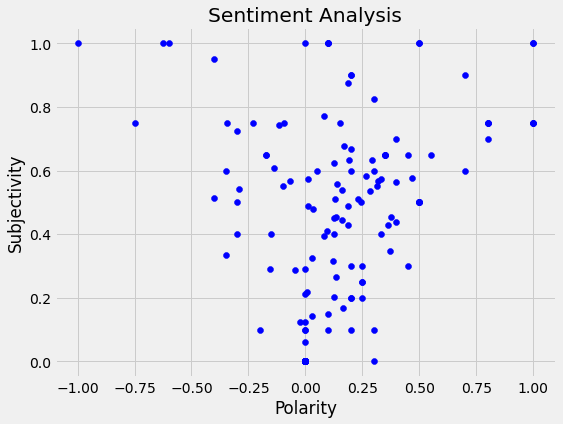

In [90]:
#plot the polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i],df['subjectivity'][i], color='Blue')


plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [91]:
#get the percentage of positive tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100,1) 

45.0

In [92]:
#get the percentage of Negative tweets

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
round((ntweets.shape[0]/df.shape[0])*100,1) 

13.0

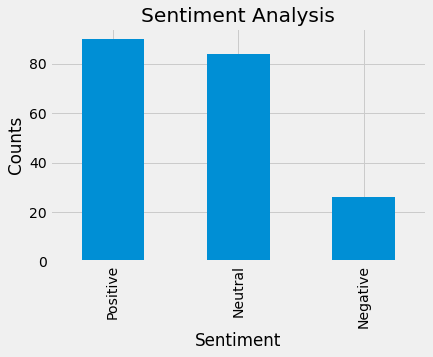

In [93]:
#show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()